# Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Customizando a plotagem

In [2]:
plt.rcParams['figure.figsize'] = (20, 40)

# Importando imagem de teste

In [3]:
target = 'teste1.jpeg'
input_image = cv2.imread(target, 0)

# Transformada de Fourier com Numpy - HPF

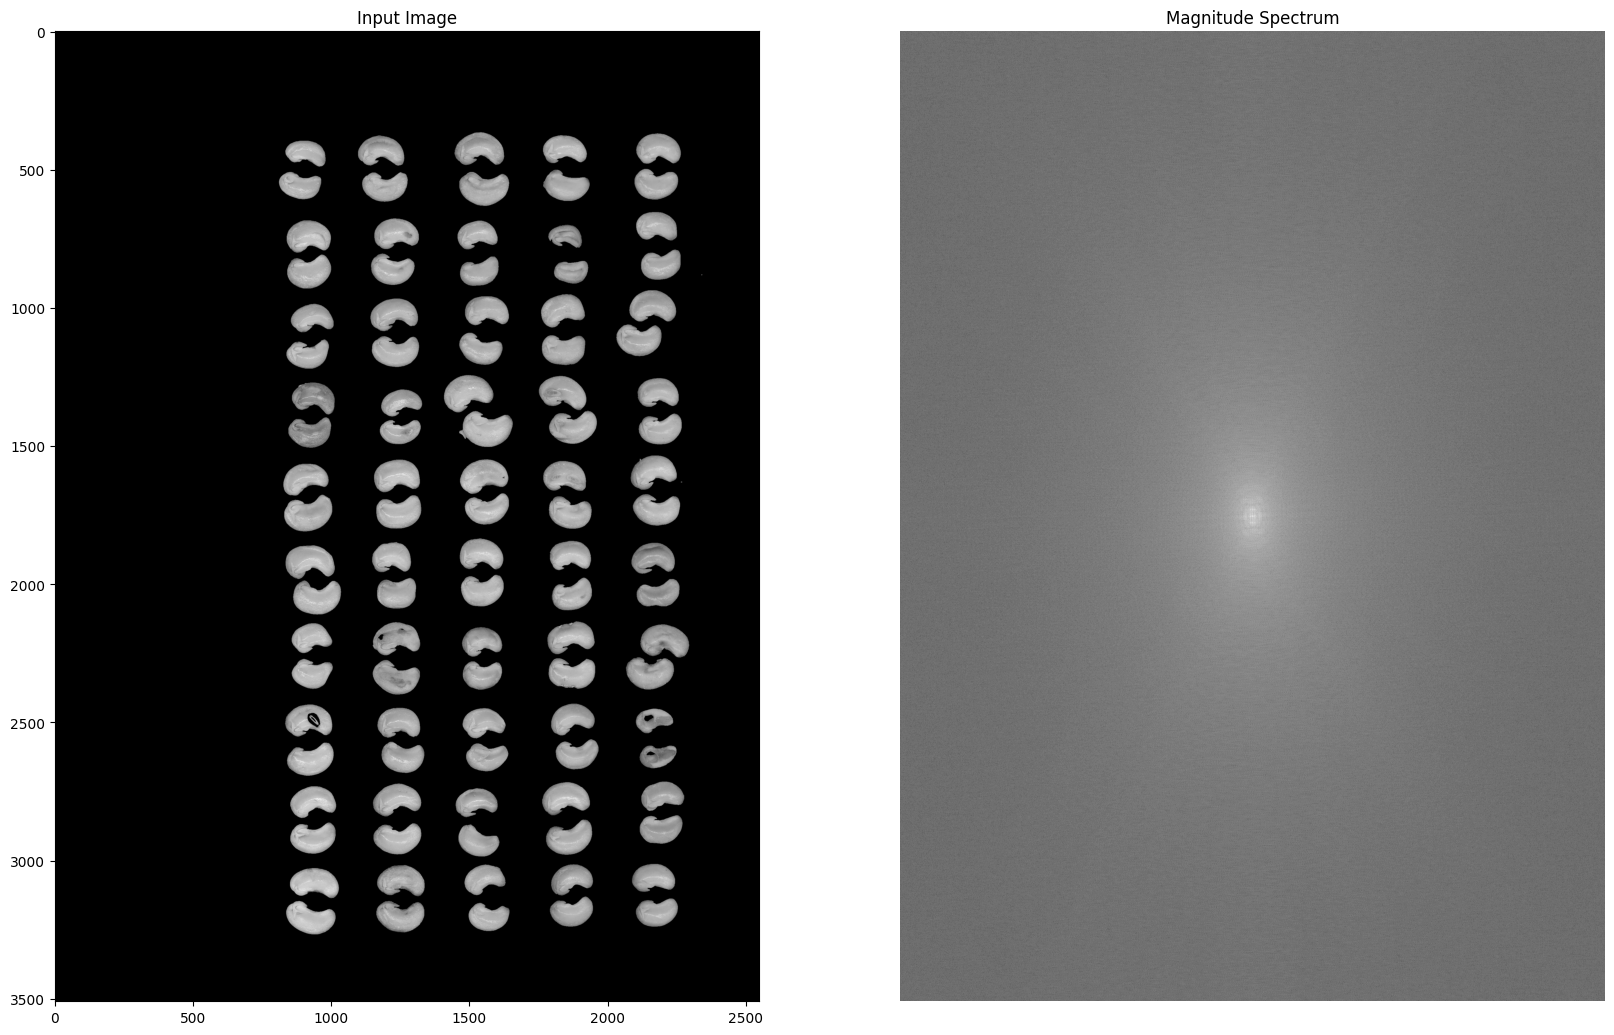

In [4]:
fourier_transform = np.fft.fft2(input_image)
shifted_fourier_transform = np.fft.fftshift(fourier_transform)

# Utilizando transformação logarítmica para ressaltar os pixels de menor intensidade
magnitude_spectrum = 20 * np.log(np.abs(shifted_fourier_transform))

plt.subplot(121)
plt.imshow(input_image, cmap = 'gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')

plt.axis('off')
plt.show()

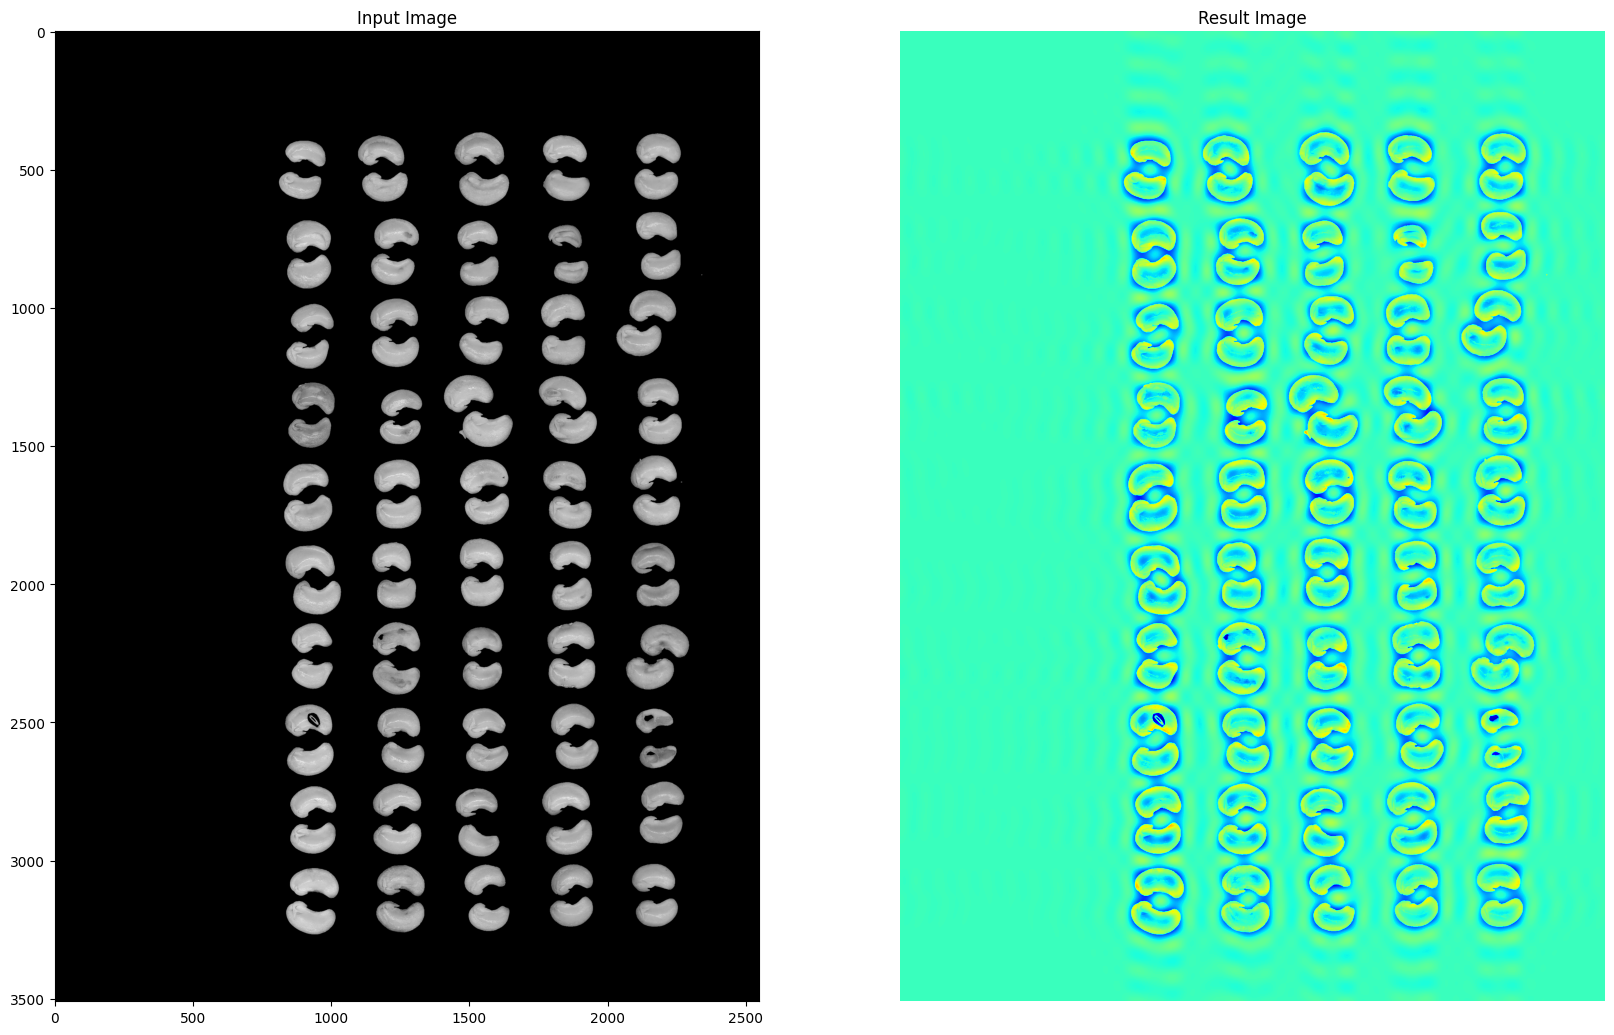

In [5]:
height, width = input_image.shape
half_height, half_width = height // 2, width // 2

# Aplicando o High Pass Filter (HPF)
shifted_fourier_transform[half_height - 30 : half_height + 30, half_width - 30 : half_width + 30] = 0
hpf_fourier_transform = np.fft.ifftshift(shifted_fourier_transform)

result_image = np.fft.ifft2(hpf_fourier_transform)
result_image = np.real(result_image)

plt.subplot(121)
plt.imshow(input_image, cmap = 'gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(result_image, cmap = 'jet')
plt.title('Result Image')

plt.axis('off')
plt.show()

# Transformada de Fourier com OpenCV - LPF

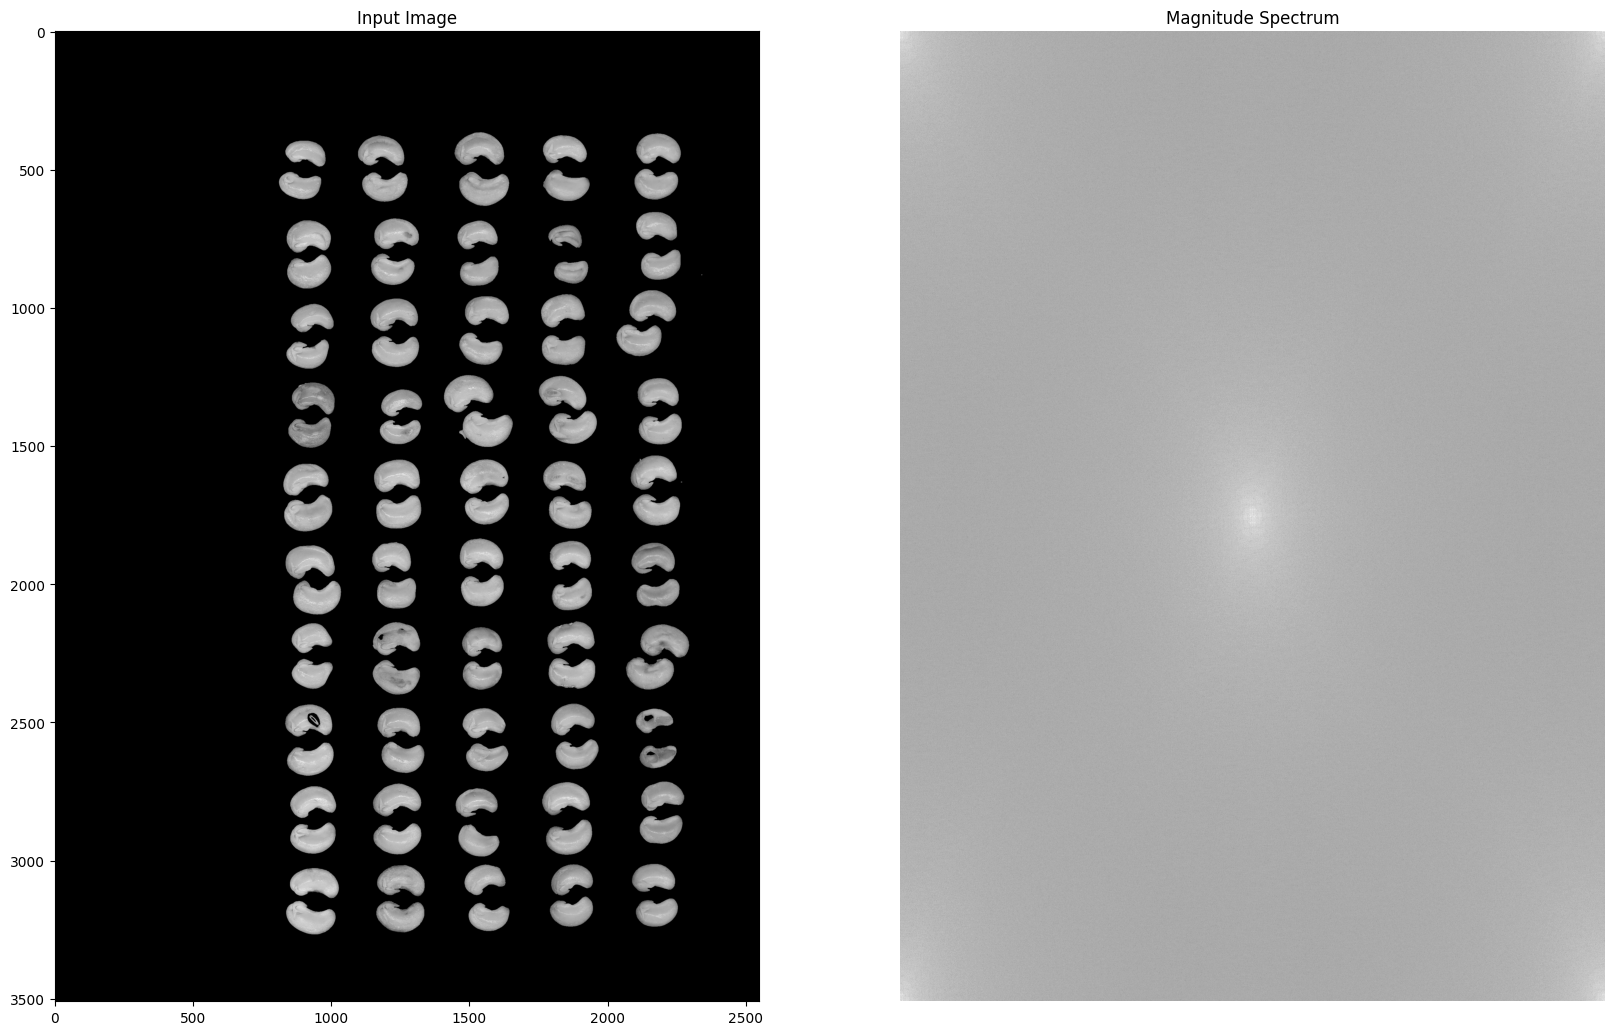

In [6]:
fourier_transform = cv2.dft(np.float32(input_image), flags = cv2.DFT_COMPLEX_OUTPUT)
shifted_fourier_transform = np.fft.fftshift(fourier_transform)

# Utilizando transformação logarítmica para ressaltar os pixels de menor intensidade
magnitude_spectrum = 20 * np.log(cv2.magnitude(shifted_fourier_transform[:, :, 0], fourier_transform[:, :, 1]))

plt.subplot(121)
plt.imshow(input_image, cmap = 'gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')

plt.axis('off')
plt.show()

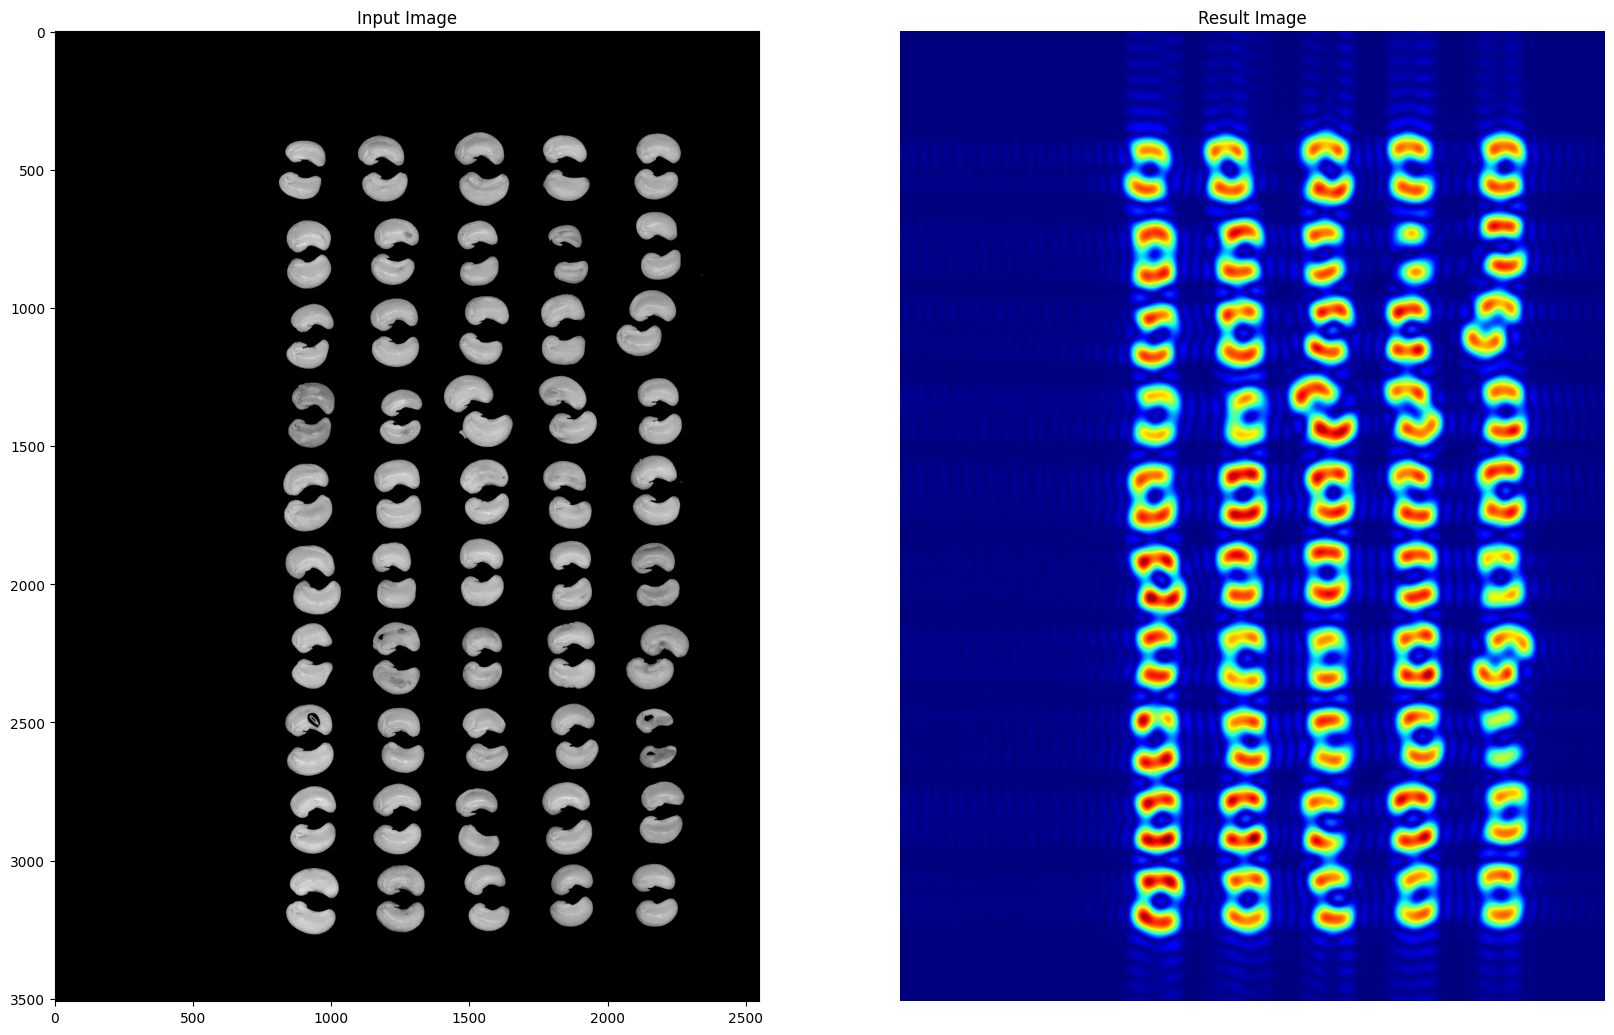

In [7]:
height, width = input_image.shape
half_height, half_width = height // 2, width // 2

lpf = np.zeros((height, width, 2), np.uint8)
lpf[half_height - 30 : half_height + 30, half_width - 30 : half_width + 30] = 1

# Aplicando o Low Pass Filter (LPF)
shifted_fourier_transform = shifted_fourier_transform * lpf
lpf_transformed_image = np.fft.ifftshift(shifted_fourier_transform)

result_image = cv2.idft(lpf_transformed_image)
result_image = cv2.magnitude(result_image[:, :, 0], result_image[:, :, 1])

plt.subplot(121)
plt.imshow(input_image, cmap = 'gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(result_image, cmap = 'jet')
plt.title('Result Image')

plt.axis('off')
plt.show()